In [214]:
# Importar Librerias

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

In [216]:
# Apuntamiento a la base de datos cargado desde mi equipo
BD = pd.read_csv("C:/Users/lizzeth/Documents/UNAD/2 SEMESTRE/ANALISIS DE DATOS/Anexo 6 - Dataset Titanic/Titanic-Dataset.csv")

In [218]:
# Muestra la información de la base de datos
BD.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [220]:
# Muestra la información de la base de datos
BD.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [222]:
# Muestra el tipo de datos
BD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [224]:
# Muestra los valores ausentes de la base de datos
BD.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [226]:
# con este validamos los valores duplicados
print(f'Número de valores duplicados: {BD.duplicated().sum()}')

Número de valores duplicados: 0


In [228]:
# eliminar la variable cabin ya que no se considera relevante y tiene muchos faltantes
BD = BD.drop('Cabin', axis = 1)
print(BD.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


In [242]:
# eliminar la variable Embarked y reemplazar por 0 los valores faltantes en age
BD['Age'].fillna(BD['Age'].mean(), inplace=True)
# BD['Age'] = BD['Age'].replace(0, BD['Age'].mean())
# BD = BD.drop('Embarked', axis = 1)
print(BD.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64


C:\Users\lizzeth\AppData\Local\Temp\ipykernel_8528\4086328580.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  BD['Age'].fillna(BD['Age'].mean(), inplace=True)


In [244]:
# eliminar la variable cabin ya que no se considera relevante y tiene muchos faltantes
BD = BD.drop('Name', axis = 1)

In [260]:
# Para saber cuantos hombres sobrevivieron
BD = BD.drop('Ticket', axis = 1)

In [262]:
# Para saber cuantos hombres sobrevivieron
BD[ BD['Sex'] == 'male']['Survived'].sum()

109

In [264]:
# Para saber cuantas mujeres sobrevivieron
BD[ BD['Sex'] == 'female']['Survived'].sum()

233

In [300]:
# Definimos cuál es la variable dependiente y el conjunto de características
X = BD.drop('Sex', axis=1)
Y = BD['Sex']  

# Dividimos la base de datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)

# Imprimimos el conjunto de características de entrenamiento
print(X_train)

     PassengerId  Survived  Pclass        Age  SibSp  Parch      Fare
638          639         0       3  41.000000      0      5   39.6875
511          512         0       3  29.699118      0      0    8.0500
730          731         1       1  29.000000      0      0  211.3375
118          119         0       1  24.000000      0      1  247.5208
46            47         0       3  29.699118      1      0   15.5000
..           ...       ...     ...        ...    ...    ...       ...
102          103         0       1  21.000000      0      1   77.2875
123          124         1       2  32.500000      0      0   13.0000
450          451         0       2  36.000000      1      2   27.7500
503          504         0       3  37.000000      0      0    9.5875
564          565         0       3  29.699118      0      0    8.0500

[668 rows x 7 columns]


In [302]:
# Creamos el modelo de regresión logística
modelo_regresion = LogisticRegression(solver="liblinear")
modelo_regresion.fit(X_train, Y_train) 

# Realizamos la predicción
Prediccion = modelo_regresion.predict(X_test)

# Imprimimos los valores de la variable dependiente de prueba
print("Valores reales de la variable dependiente en el conjunto de prueba:")
print(Y_test)

Valores reales de la variable dependiente en el conjunto de prueba:
465      male
826      male
443    female
71     female
611      male
        ...  
401      male
145      male
279    female
47     female
860      male
Name: Sex, Length: 223, dtype: object


In [304]:
# Mostramos la predicción realizada por el modelo
print("Predicciones realizadas por el modelo:")
print(Prediccion)

Predicciones realizadas por el modelo:
['male' 'male' 'female' 'female' 'male' 'male' 'male' 'male' 'female'
 'male' 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'female' 'male'
 'male' 'male' 'female' 'male' 'male' 'male' 'male' 'male' 'female'
 'female' 'male' 'male' 'female' 'male' 'female' 'male' 'female' 'female'
 'male' 'male' 'female' 'male' 'female' 'female' 'female' 'female'
 'female' 'male' 'female' 'female' 'male' 'female' 'male' 'male' 'male'
 'male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'female' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male'
 'male' 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'male'
 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male' 'male'
 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'male' 'male'
 'male' 'female' 'female' 'female' 'fem

In [306]:
# Imprimimos el informe de clasificación
print("Informe de clasificación:")
print(classification_report(Y_test, Prediccion))

Informe de clasificación:
              precision    recall  f1-score   support

      female       0.66      0.76      0.71        79
        male       0.86      0.78      0.82       144

    accuracy                           0.78       223
   macro avg       0.76      0.77      0.76       223
weighted avg       0.79      0.78      0.78       223



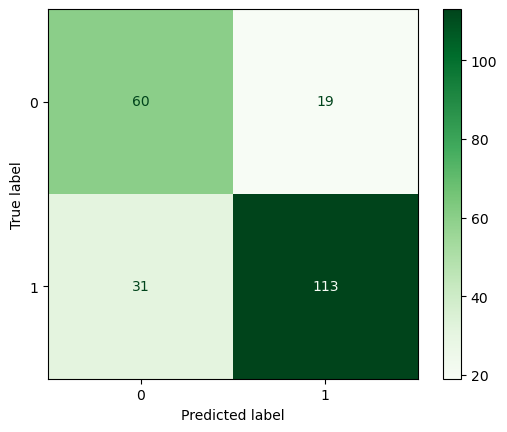

In [308]:
# Creamos la matriz de confusión
cm = confusion_matrix(Y_test, Prediccion)

# Creamos un objeto para mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap='Greens') 
plt.show()  